In [1]:
!pip install cvxpy

In [2]:
# Packages you will need 

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski
import math
import skimage.io
import skimage.transform

import scipy.fftpack as spfft # for discrete cosine transform 

Original size:  (292, 228)
Rescaled size:  (53, 41)


/tmp/ipykernel_12585/3225237025.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img_og = ski.color.rgb2gray(img_og)


Text(0.5, 1.0, 'Rescaled image')

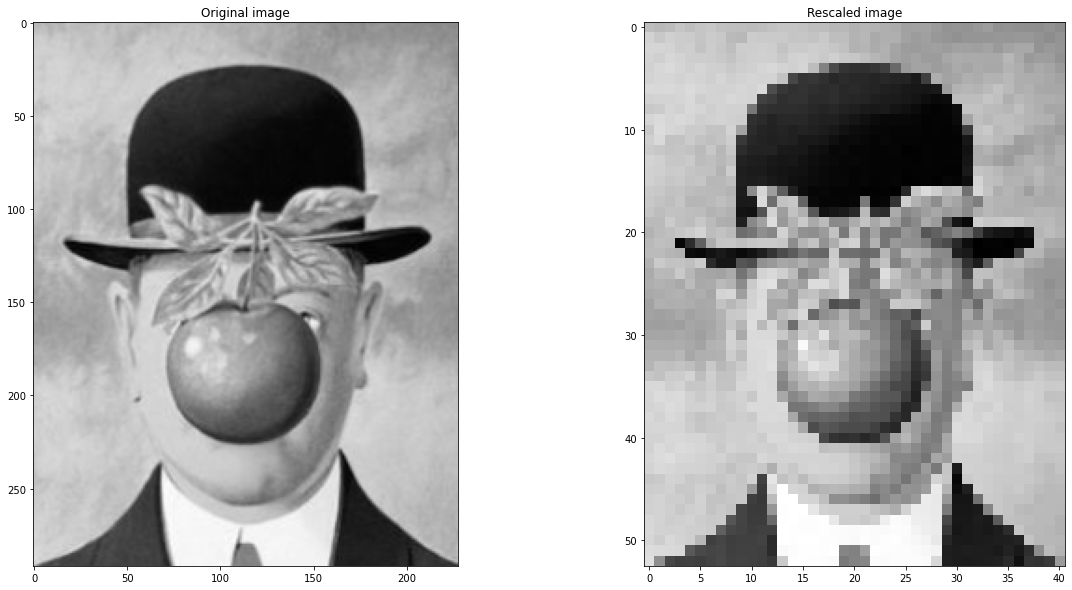

In [3]:
# import image and rescale 

img_path = '/home/sathvikc/AMATH-482-2/AMATH-482/Homework Assignments/Homework 5/SonOfMan.png'

# read image
img_og = ski.io.imread(img_path)

# convert to grayscale and visualize 
img_og = ski.color.rgb2gray(img_og)

fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(img_og, cmap = 'gray')
ax[0].set_title("Original image")

print("Original size: ", img_og.shape)

# resize image 
img = ski.transform.rescale( img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)

ax[1].imshow(img, cmap='gray')
ax[1].set_title("Rescaled image")

In [4]:
# constrauct forward and inverse DCT matrices 

# construct DCT matrix
def construct_DCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: D DCT matrix mapping image.flatten() to 
  #         DCT(image).flatten()

  Dx = spfft.dct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.dct(np.eye(Ny), axis = 0, norm='ortho')

  D = np.kron(Dy, Dx)

  return D

# construct inverse DCT matrix
def construct_iDCT_Mat( Nx, Ny ):

  # input : Nx number of columns of image 
  #         Ny number of rows of image 

  # output: iD iDCT matrix mapping DCT(image).flatten() to 
  #         image.flatten()

  Dx = spfft.idct(np.eye(Nx), axis =0, norm='ortho')

  Dy = spfft.idct(np.eye(Ny), axis = 0, norm = 'ortho')

  D = np.kron(Dy, Dx)

  return D

Question 1

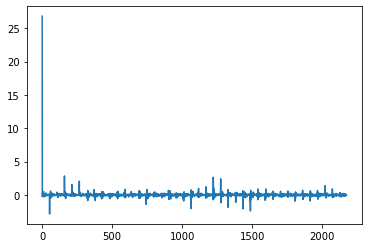

In [5]:
DCT = construct_DCT_Mat(53, 41)
iDCT = construct_iDCT_Mat(53, 41)
DCT_F = np.dot(DCT, img.flatten())
fig, ax = plt.subplots()
ax.plot(np.copy(DCT_F));

Cutoff value:  0.2799011285792195
Cutoff value:  0.1765664344256237
Cutoff value:  0.09807774700885896
Cutoff value:  0.026025361428830194


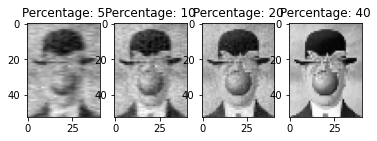

In [6]:
percentages = [5, 10, 20, 40]
fig, ax = plt.subplots(1, 4)
for index, percent in enumerate(percentages): 
  copy_of_DFT = np.copy(DCT_F)

  cutoff_value = np.percentile(copy_of_DFT, 100 - percent)
  print("Cutoff value: ", cutoff_value)
  for i in range(len(copy_of_DFT)):
    if np.abs(copy_of_DFT[i]) < cutoff_value:
      copy_of_DFT[i] = 0

  vec_F = np.dot(iDCT, copy_of_DFT)

  image = np.reshape(vec_F, (53, 41))
  ax[index].imshow(image, cmap='gray')
  ax[index].set_title("Percentage: " + str(percent))

Question 2

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 17 11:10:02 PM: Your problem has 2173 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 11:10:02 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 11:10:02 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 11:10:02 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:10:02 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 11:10:02 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:10:02 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:10:02 PM: Finished problem compilation (took 4.277e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:10:02 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.1726e-13 -1.3626e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.2326e+01  3.2461e+01  6e+03  2e+02  7e-16  6e-01
 2:  4.6835e+01  4.7175e+01  2e+03  7e+01  3e-16  5e-01
 3:  7.5075e+01  7.5221e+01  9e+02  3e+01  4e-16  2e-01
 4:  1.0773e+02  1.0780e+02  4e+02  1e+01  3e-16  9e-02
 5:  1.3018e+02  1.3021e+02  2e+02  5e+00  5e-16  4e-02
 6:  1.3951e+02  1.3952e+02  7e+01  2e+00  6e-16  2e-02
 7:  1.4320e+02  1.4320e+02  3e+01  9e-01  5e-16  7e-03
 8:  1.4493e+02  1.4494e+02  1e+01  4e-01  7e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:10:36 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:10:36 PM: Finished problem compilation (took 3.955e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:10:36 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  9.4133e-14 -1.6298e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.2375e+01  3.2512e+01  6e+03  2e+02  6e-16  6e-01
 2:  4.6069e+01  4.6414e+01  2e+03  7e+01  3e-16  5e-01
 3:  7.3238e+01  7.3386e+01  9e+02  3e+01  4e-16  2e-01
 4:  1.0292e+02  1.0299e+02  4e+02  1e+01  4e-16  1e-01
 5:  1.2575e+02  1.2578e+02  2e+02  5e+00  5e-16  4e-02
 6:  1.3596e+02  1.3597e+02  8e+01  2e+00  7e-16  2e-02
 7:  1.4017e+02  1.4017e+02  4e+01  1e+00  6e-16  8e-03
 8:  1.4186e+02  1.4186e+02  2e+01  5e-01  5e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:11:10 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:11:10 PM: Finished problem compilation (took 3.962e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:11:10 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  5.8030e-14 -1.5284e-13  1e+04  4e+02  1e-15  1e+00
 1:  3.1261e+01  3.1392e+01  6e+03  2e+02  6e-16  6e-01
 2:  4.4337e+01  4.4667e+01  2e+03  6e+01  3e-16  5e-01
 3:  7.7397e+01  7.7495e+01  6e+02  2e+01  4e-16  1e-01
 4:  1.0929e+02  1.0933e+02  3e+02  9e+00  4e-16  7e-02
 5:  1.2867e+02  1.2869e+02  1e+02  4e+00  5e-16  3e-02
 6:  1.3633e+02  1.3634e+02  6e+01  2e+00  6e-16  1e-02
 7:  1.3905e+02  1.3906e+02  3e+01  9e-01  5e-16  7e-03
 8:  1.4088e+02  1.4088e+02  1e+01  3e-01  7e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:11:41 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:11:42 PM: Finished problem compilation (took 8.406e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:11:42 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  9.7695e-13  4.2182e-13  3e+04  8e+02  3e-15  1e+00
 1:  3.2314e+01  3.2660e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.2016e+01  5.2202e+01  2e+03  5e+01  3e-16  2e-01
 3:  1.1161e+02  1.1169e+02  6e+02  2e+01  4e-16  1e-01
 4:  1.6538e+02  1.6540e+02  2e+02  6e+00  6e-16  4e-02
 5:  1.9051e+02  1.9052e+02  8e+01  2e+00  7e-16  1e-02
 6:  2.0038e+02  2.0038e+02  3e+01  1e+00  8e-16  6e-03
 7:  2.0375e+02  2.0375e+02  2e+01  5e-01  1e-15  3e-03
 8:  2.0561e+02  2.0561e+02  6e+00  2e-01  9e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:12:28 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:12:29 PM: Finished problem compilation (took 8.376e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:12:29 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.0323e-12  3.5872e-13  3e+04  8e+02  3e-15  1e+00
 1:  3.2091e+01  3.2432e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.2171e+01  5.2353e+01  1e+03  4e+01  3e-16  2e-01
 3:  1.1165e+02  1.1173e+02  6e+02  2e+01  4e-16  1e-01
 4:  1.6113e+02  1.6115e+02  2e+02  6e+00  6e-16  3e-02
 5:  1.8479e+02  1.8480e+02  7e+01  2e+00  7e-16  1e-02
 6:  1.9221e+02  1.9221e+02  3e+01  1e+00  9e-16  7e-03
 7:  1.9585e+02  1.9586e+02  1e+01  4e-01  9e-16  3e-03
 8:  1.9746e+02  1.9746e+02  6e+00  2e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 6 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:13:15 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:13:16 PM: Finished problem compilation (took 9.020e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:13:16 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  9.2569e-13  3.8551e-13  2e+04  8e+02  3e-15  1e+00
 1:  3.2258e+01  3.2594e+01  1e+04  3e+02  1e-15  8e-01
 2:  5.3726e+01  5.3907e+01  1e+03  4e+01  3e-16  2e-01
 3:  1.0986e+02  1.0994e+02  7e+02  2e+01  4e-16  1e-01
 4:  1.6334e+02  1.6337e+02  2e+02  6e+00  6e-16  4e-02
 5:  1.8878e+02  1.8879e+02  8e+01  3e+00  7e-16  1e-02
 6:  1.9833e+02  1.9833e+02  4e+01  1e+00  9e-16  7e-03
 7:  2.0173e+02  2.0173e+02  2e+01  6e-01  1e-15  4e-03
 8:  2.0372e+02  2.0372e+02  8e+00  2e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:14:02 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:14:03 PM: Finished problem compilation (took 1.348e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:14:03 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  2.5921e-12 -2.1472e-13  4e+04  1e+03  8e-15  1e+00
 1:  3.2820e+01  3.3433e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.5440e+01  5.5550e+01  2e+03  6e+01  9e-16  2e-01
 3:  1.2993e+02  1.2997e+02  5e+02  2e+01  5e-16  5e-02
 4:  2.0000e+02  2.0001e+02  2e+02  5e+00  8e-16  2e-02
 5:  2.2842e+02  2.2843e+02  6e+01  2e+00  1e-15  7e-03
 6:  2.3907e+02  2.3907e+02  2e+01  7e-01  1e-15  3e-03
 7:  2.4311e+02  2.4312e+02  1e+01  3e-01  1e-15  2e-03
 8:  2.4470e+02  2.4470e+02  5e+00  1e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:15:04 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:15:05 PM: Finished problem compilation (took 1.305e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:15:05 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  3.1233e-12 -1.2446e-13  4e+04  1e+03  8e-15  1e+00
 1:  3.2925e+01  3.3541e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.5667e+01  5.5774e+01  2e+03  6e+01  4e-16  2e-01
 3:  1.2684e+02  1.2688e+02  6e+02  2e+01  6e-16  6e-02
 4:  1.9136e+02  1.9138e+02  2e+02  6e+00  7e-16  2e-02
 5:  2.2596e+02  2.2596e+02  6e+01  2e+00  1e-15  7e-03
 6:  2.3698e+02  2.3698e+02  2e+01  7e-01  1e-15  3e-03
 7:  2.4093e+02  2.4093e+02  1e+01  3e-01  1e-15  2e-03
 8:  2.4291e+02  2.4291e+02  4e+00  1e-01  1e-1

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 9 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:16:06 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:16:06 PM: Finished problem compilation (took 1.305e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:16:06 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  2.4092e-12 -1.7570e-13  4e+04  1e+03  8e-15  1e+00
 1:  3.2625e+01  3.3231e+01  1e+04  4e+02  3e-15  1e+00
 2:  5.5721e+01  5.5825e+01  2e+03  6e+01  8e-16  2e-01
 3:  1.3006e+02  1.3010e+02  6e+02  2e+01  6e-16  6e-02
 4:  1.9555e+02  1.9557e+02  2e+02  6e+00  8e-16  2e-02
 5:  2.2927e+02  2.2927e+02  6e+01  2e+00  1e-15  8e-03
 6:  2.4000e+02  2.4001e+02  2e+01  7e-01  1e-15  4e-03
 7:  2.4342e+02  2.4342e+02  1e+01  3e-01  1e-15  2e-03
 8:  2.4539e+02  2.4539e+02  4e+00  1e-01  1e-1

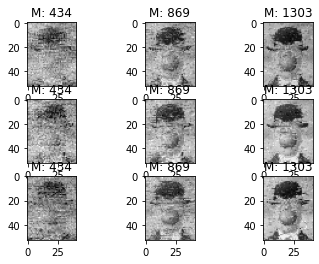

In [7]:
N = 53 * 41
r_vals = [0.2, 0.4, 0.6]
fig, ax = plt.subplots(3, 3)
for index, r in enumerate(r_vals): 
    for i in range(3):
        M = int(N * r)
        identity = np.eye(N)
        random_permutation = np.random.permutation(identity)
        B = random_permutation[0:M, :]
        y = B@img.flatten()

        A = np.matmul(B, iDCT)

        x_l1 = cvx.Variable(N)
        objective = cvx.Minimize(cvx.norm(x_l1, 1))
        constraints = [A * x_l1 == y]
        cvx.Problem(objective, constraints).solve(verbose=True, solver = 'CVXOPT', max_iter = 1000, reltol = 1e-2, featol = 1e-2)
        x_star = x_l1.value
        print(x_star)


        vec_F = np.dot(iDCT, x_star)

        image = np.reshape(vec_F, (53, 41))
        ax[i][index].imshow(image, cmap='gray')
        ax[i][index].set_title("M: " + str(M))

Question 3

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Mar 17 11:28:12 PM: Your problem has 2500 variables, 1 constraints, and 0 parameters.
(CVXPY) Mar 17 11:28:12 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 17 11:28:12 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 17 11:28:12 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:28:12 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Mar 17 11:28:12 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffin

/home/sathvikc/anaconda3/lib/python3.9/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Mar 17 11:28:13 PM: Applying reduction CVXOPT
(CVXPY) Mar 17 11:28:15 PM: Finished problem compilation (took 2.662e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Mar 17 11:28:15 PM: Invoking solver CVXOPT  to obtain a solution.
     pcost       dcost       gap    pres   dres   k/t
 0:  1.0896e-14  7.2587e-14  3e+04  1e+03  4e-15  1e+00
 1:  2.9658e+01  3.0189e+01  1e+04  3e+02  1e-15  8e-01
 2:  7.2764e+01  7.2857e+01  1e+03  4e+01  4e-16  1e-01
 3:  2.0177e+02  2.0179e+02  3e+02  8e+00  1e-15  3e-02
 4:  2.8074e+02  2.8075e+02  1e+02  3e+00  2e-15  1e-02
 5:  3.0448e+02  3.0449e+02  4e+01  1e+00  2e-15  5e-03
 6:  3.1328e+02  3.1329e+02  2e+01  6e-01  2e-15  3e-03
 7:  3.1837e+02  3.1837e+02  8e+00  2e-01  2e-15  1e-03
 8:  3.2029e+02  3.2029e+02  3e+00  9e-02  3e-1

Text(0.5, 1.0, 'M: 1303')

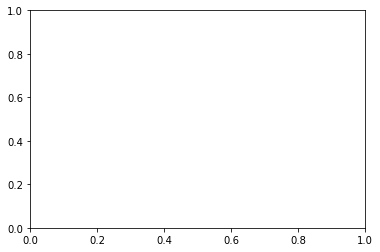

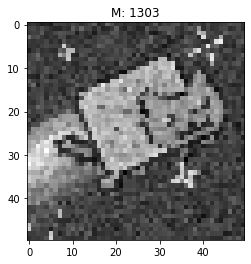

In [11]:
unknown_image = np.load('/home/sathvikc/AMATH-482-2/AMATH-482/Homework Assignments/Homework 5/UnknownImage.npz', allow_pickle=True)
B = unknown_image['B']
y = unknown_image['y']
DCT = construct_DCT_Mat(50, 50)
iDCT = construct_iDCT_Mat(50, 50)
fig, ax = plt.subplots()
N = 50 * 50
r_vals = [0.2, 0.4, 0.6]
fig, ax = plt.subplots()

A = np.matmul(B, iDCT)

x_l1 = cvx.Variable(N)
objective = cvx.Minimize(cvx.norm(x_l1, 1))
constraints = [A * x_l1 == y]
cvx.Problem(objective, constraints).solve(verbose=True, solver = 'CVXOPT', max_iter = 1000, reltol = 1e-2, featol = 1e-2)
x_star = x_l1.value
print(x_star)


vec_F = np.dot(iDCT, x_star)

image = np.reshape(vec_F, (50, 50))
ax.imshow(image, cmap='gray')
ax.set_title("M: " + str(M))